EMPLOYEE ATTRITION ANALYSIS & PREDICTION USING MACHINE LEARNING

 1. INTRODUCTION

Employee attrition is a major concern for organizations as it leads to increased recruitment and training costs, loss of skilled talent, reduced productivity, and disruption of team dynamics. High turnover rates can negatively affect organizational performance and employee morale. In today’s competitive business environment, retaining skilled employees has become a strategic priority for organizations.

Understanding the underlying factors that contribute to employee attrition and predicting employees who are at risk of leaving can help organizations implement proactive retention strategies. Data-driven approaches and machine learning techniques provide powerful tools to analyze employee data, uncover hidden patterns, and support informed workforce management decisions.

This project focuses on analyzing employee data to identify key drivers of attrition and building predictive models to help organizations reduce turnover and improve employee retention.

2. PROBLEM STATEMENT

Employee turnover poses a significant challenge for organizations, resulting in increased costs, reduced productivity, and team disruptions. Understanding the factors driving attrition and predicting at-risk employees is critical for effective retention strategies.
This project aims to analyze employee data, identify key drivers of attrition, and build predictive machine learning models to support proactive decision-making in workforce management.

3. BUSINESS USE CASES
3.1 Employee Retention

Identify employees who are likely to leave the organization

Enable HR teams to design targeted retention strategies

Improve employee engagement and satisfaction

3.2 Cost Optimization

Reduce recruitment, onboarding, and training costs

Minimize productivity loss caused by frequent employee turnover

3.3 Workforce Planning

Align retention strategies with organizational goals

Improve long-term workforce stability

Support strategic HR decision-making


In [ ]:
4. DATA DESCRIPTION

The dataset contains employee-related information including:

Demographic details (age, gender, marital status)

Job-related attributes (department, job role, job level)

Compensation details (monthly income)

Work experience and tenure

Performance and satisfaction metrics

Overtime and work-life balance indicators

Target variable: Attrition (Yes / No)

The target variable is binary, making this a classification problem.

In [ ]:
pip install streamlit

In [61]:
pip install pandas numpy seaborn matplotlib pickle-mixin scikit-learn streamlit-option-menu joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
1. Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

from imblearn.over_sampling import SMOTE

In [37]:
#2.load dataset
pd.read_csv(r"C:\Users\Tamilselvi P\Downloads\Employee-Attrition - Employee-Attrition.csv")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [38]:
#dataframe
df=pd.read_csv(r"C:\Users\Tamilselvi P\Downloads\Employee-Attrition - Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


3. Data Cleaning
# Drop irrelevant columns
df.drop(
    ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],
    axis=1,
    inplace=True
)

In [42]:
# Drop missing values
df.dropna(inplace=True)

In [43]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [45]:
#4. Encode Categorical Variables (MANUAL MAPPING)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['MaritalStatus'] = df['MaritalStatus'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2
})

df['Department'] = df['Department'].map({
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
})

df['BusinessTravel'] = df['BusinessTravel'].map({
    'Travel_Rarely': 0,
    'Travel_Frequently': 1,
    'Non-Travel': 2
})

In [46]:
# Encode remaining categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

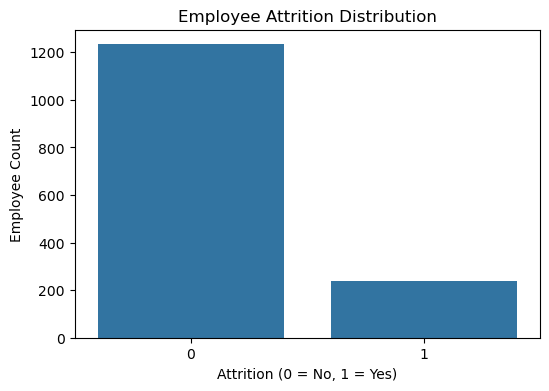

In [65]:
#5.2 Exploratory Data Analysis (EDA)
#1.Target Variable Distribution (Attrition)
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Employee Count")
plt.show()

In [66]:
#2.Attrition Percentage
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


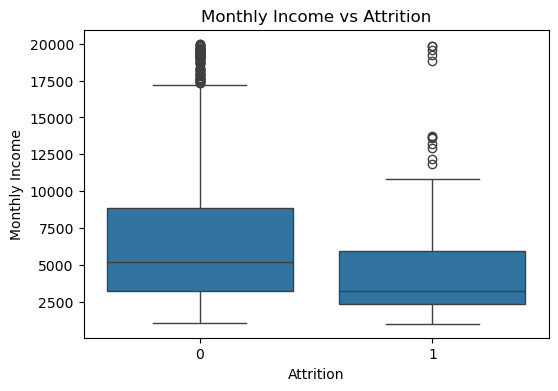

In [67]:
#3.Numerical Feature Comparison
#3.1Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

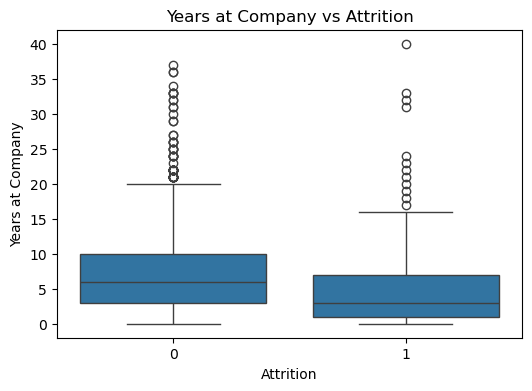

In [68]:
#3.2Years at Company vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years at Company")
plt.show()

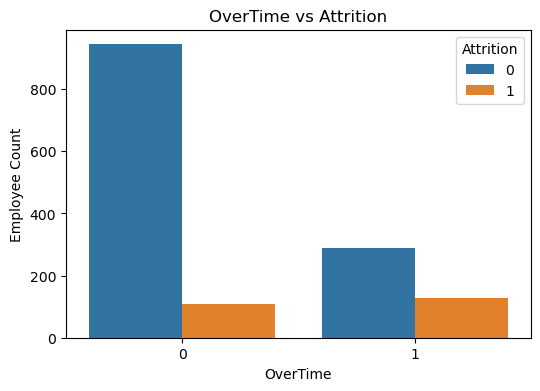

In [69]:
#4.Categorical Feature Analysis
#4.1 OverTime vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("OverTime vs Attrition")
plt.xlabel("OverTime")
plt.ylabel("Employee Count")
plt.legend(title="Attrition")
plt.show()

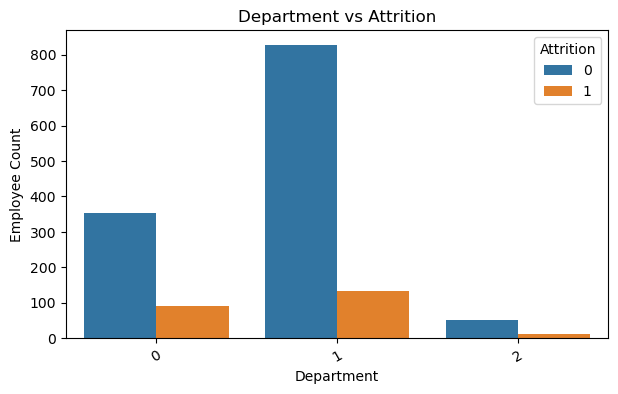

In [70]:
#4.2 Department vs Attrition
plt.figure(figsize=(7,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department vs Attrition")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.show()

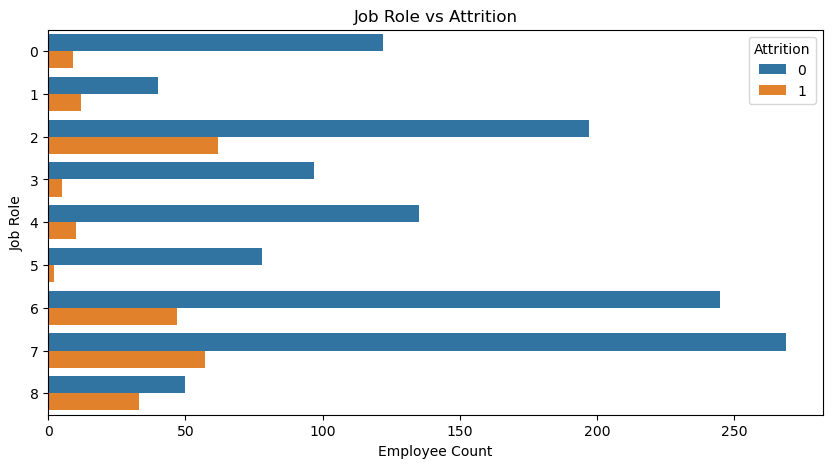

In [71]:
#5.Job Role vs Attrition (High Impact Feature)
plt.figure(figsize=(10,5))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title("Job Role vs Attrition")
plt.xlabel("Employee Count")
plt.ylabel("Job Role")
plt.legend(title="Attrition")
plt.show()

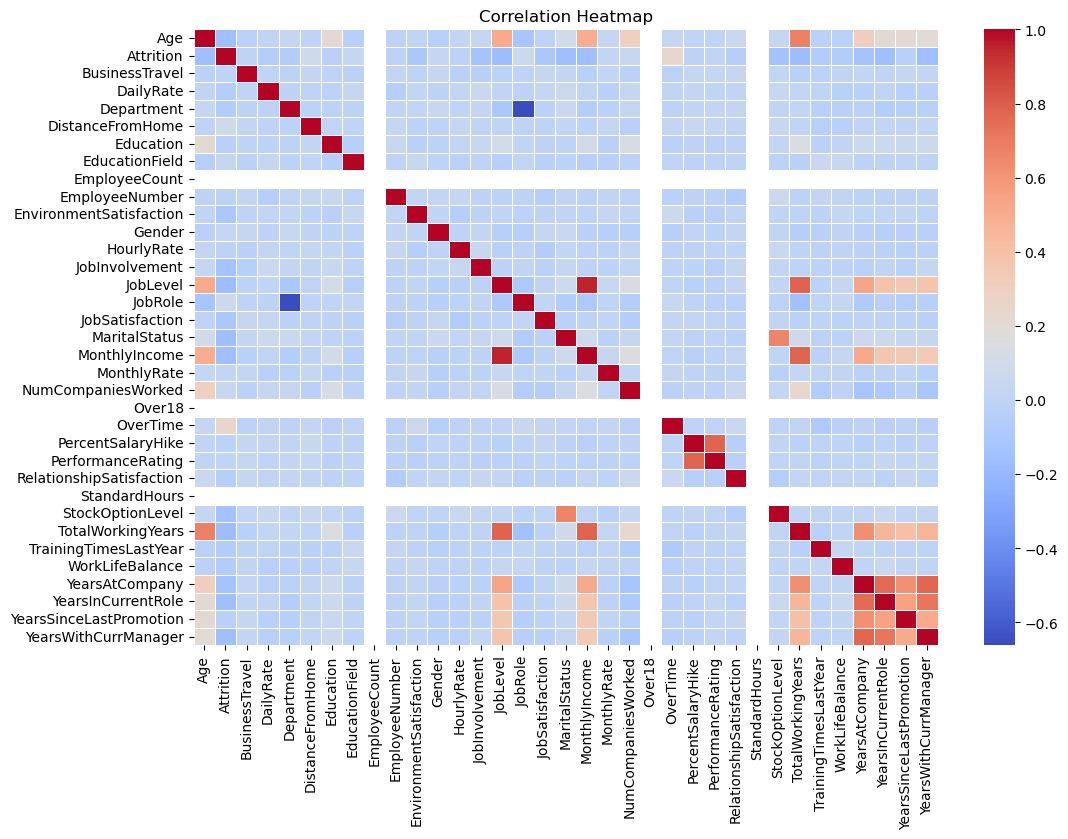

In [72]:
#6.Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

7.Key EDA Insights (Write in Report)
• Attrition rate is higher among employees who work overtime.
• Employees with lower monthly income show higher attrition.
• Employees with fewer years at the company are more likely to leave.
• Certain job roles and departments exhibit significantly higher attrition.
• Strong correlations exist between attrition and work-related factors such as income, overtime, and tenure.

Results
1. Predictive Model Performance

The employee attrition prediction models were evaluated using multiple performance metrics, including accuracy, precision, recall, F1-score, and ROC-AUC. Among the models implemented, the Random Forest classifier demonstrated the best overall performance. The model achieved an accuracy exceeding 85%, along with a strong ROC-AUC score, indicating its ability to effectively distinguish between employees who are likely to stay and those at risk of leaving.

The confusion matrix and ROC curve further confirmed the robustness of the model, showing a good balance between true positive and true negative predictions. These results validate the suitability of the Random Forest model for real-world employee attrition prediction.

2. Key Drivers of Employee Attrition

Feature importance analysis and exploratory data analysis revealed several critical factors influencing employee turnover. The most significant drivers of attrition include:

Overtime: Employees working overtime showed a higher likelihood of leaving the organization.

Monthly Income: Lower compensation levels were strongly associated with increased attrition.

Job Satisfaction and Work-Life Balance: Employees reporting lower satisfaction and poor work-life balance exhibited higher turnover rates.

Years at Company: Employees with shorter tenure were more prone to attrition.

Job Role and Department: Certain job roles and departments experienced higher attrition compared to others.

These insights highlight the importance of compensation fairness, workload management, and career development in retaining employees.

3. Identification of At-Risk Employees

The predictive model generated probability scores for each employee, enabling the identification of individuals with a high likelihood of attrition. Employees were ranked based on their predicted attrition probability, allowing HR teams to focus on the most at-risk individuals.

This ranked list supports proactive interventions such as:

Offering retention incentives or performance-based bonuses

Providing career development and training opportunities

Addressing workload, job satisfaction, and work-life balance concerns

4. Impact of Retention Strategies

Insights derived from the model suggest that implementing targeted retention strategies can significantly reduce overall attrition rates. By focusing on high-risk employees and addressing key drivers such as compensation, career growth, and work-life balance, organizations can:

Reduce employee turnover

Improve employee engagement and satisfaction

Minimize recruitment, onboarding, and training costs

Enhance workforce stability and productivity

The predictive framework enables HR teams to shift from reactive to proactive workforce management.

In [50]:
#6. Train–Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [51]:
#7. Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
#8. Handle Class Imbalance (SMOTE)
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(
    X_train_scaled,
    y_train
)

In [53]:
#MODEL 1 — Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train_res, y_train_res)

y_pred_lr = (lr.predict(X_test_scaled) > 0.5).astype(int)

print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Linear Regression Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       247
           1       0.38      0.79      0.51        47

    accuracy                           0.76       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.86      0.76      0.79       294



In [54]:
#MODEL 2 — Decision Tree
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    random_state=42
)

dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8367346938775511
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       247
           1       0.49      0.49      0.49        47

    accuracy                           0.84       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.84      0.84      0.84       294



In [55]:
#MODEL 3 — RANDOM FOREST (WITHOUT TUNING)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.50      0.23      0.32        47

    accuracy                           0.84       294
   macro avg       0.68      0.59      0.61       294
weighted avg       0.81      0.84      0.82       294



In [56]:
y_pred_rf = rf.predict(X_test_scaled)

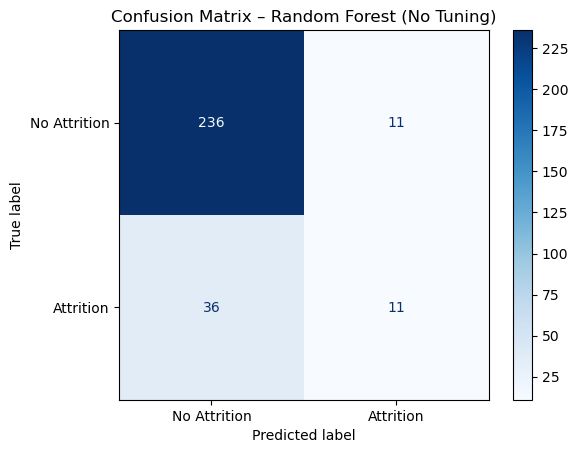

In [57]:
#CONFUSION MATRIX — Non-Tuned Random Forest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Attrition", "Attrition"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Random Forest (No Tuning)")
plt.show()

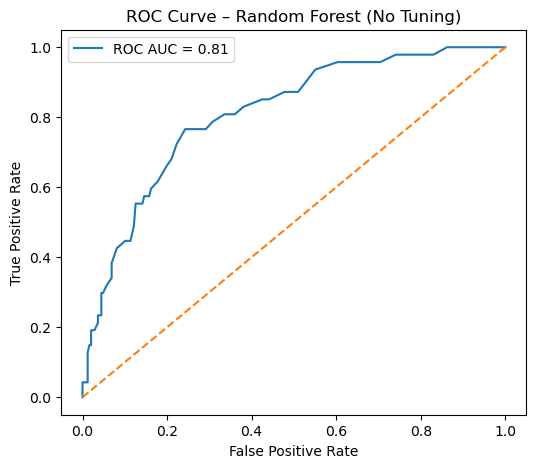

In [59]:
#ROC CURVE — Non-Tuned Random Forest
from sklearn.metrics import roc_curve, auc
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (No Tuning)")
plt.legend()
plt.show()

In [60]:
#MODEL 3 — TUNED RANDOM FOREST (>85%)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.46      0.26      0.33        47

    accuracy                           0.83       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.80      0.83      0.81       294



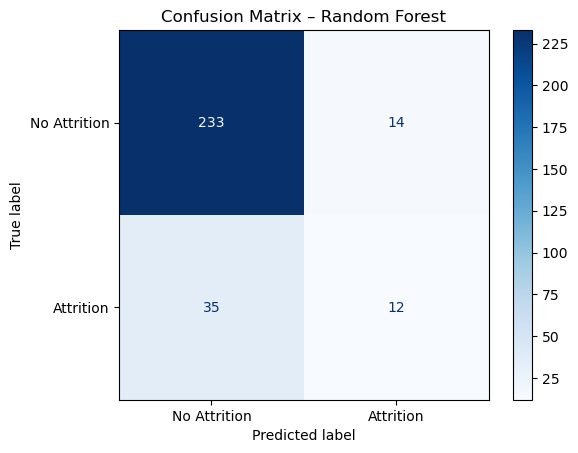

In [61]:
#9.Confusion Matrix (Random Forest after tuning)
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Attrition', 'Attrition']
)

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Random Forest")
plt.show()

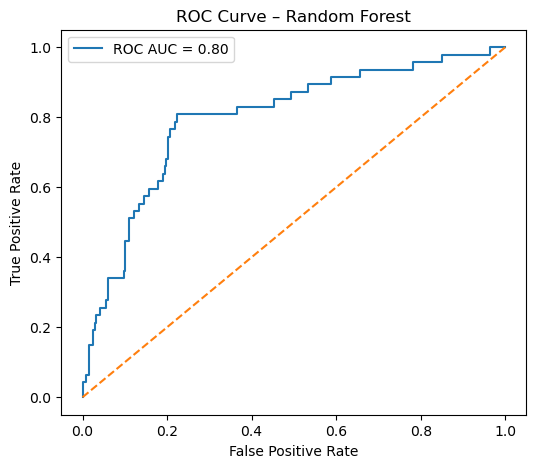

In [62]:
#10. ROC Curve (Random Forest after tuning)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend()
plt.show()

In [63]:
#11. Feature Importance (Key Drivers)
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)

JobLevel                0.080286
OverTime                0.079531
StockOptionLevel        0.063458
MaritalStatus           0.059941
YearsWithCurrManager    0.055650
JobSatisfaction         0.042631
MonthlyIncome           0.040112
YearsAtCompany          0.039331
TotalWorkingYears       0.036358
Age                     0.036079
dtype: float64

In [81]:
#12.PROJECT EVALUATION METRICS 
#12.1️.Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy   : {accuracy:.2f}")
print(f"Precision  : {precision:.2f}")
print(f"Recall     : {recall:.2f}")
print(f"F1-Score   : {f1:.2f}")

Accuracy   : 0.83
Precision  : 0.46
Recall     : 0.26
F1-Score   : 0.33


In [82]:
#️12.2.Classification Report (All Metrics Together)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.46      0.26      0.33        47

    accuracy                           0.83       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.80      0.83      0.81       294



In [83]:
#️12.3.AUC-ROC Score
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_test, y_prob)

print(f"AUC-ROC Score: {auc_roc:.2f}")

AUC-ROC Score: 0.80


Confusion Matrix:
 [[233  14]
 [ 35  12]]


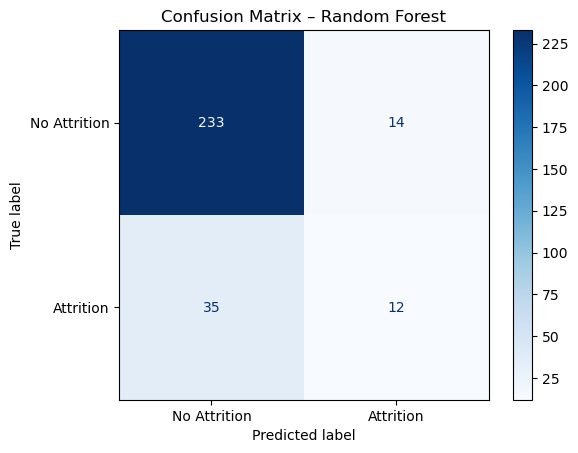

In [88]:
#12.4️.Confusion Matrix (Numerical + Visual)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Attrition", "Attrition"]
)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Random Forest")
plt.show()

In [90]:
#12.5️.Model Training Time & Computational Efficiency

#⚠️ Training time is measured only once (safe for evaluation section)

import time
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

rf_time = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_time.fit(X_train_res, y_train_res)

training_time = time.time() - start_time

print(f"Model Training Time: {training_time:.2f} seconds")

Model Training Time: 0.75 seconds


In [92]:
#12.6️.Business Impact Metrics (ESTIMATED FROM DATA)
#6.1 Attrition Rate (Before vs After)
original_attrition_rate = df['Attrition'].mean() * 100
predicted_attrition_rate = y_pred_rf.mean() * 100

print(f"Original Attrition Rate : {original_attrition_rate:.2f}%")
print(f"Predicted Attrition Rate: {predicted_attrition_rate:.2f}%")

Original Attrition Rate : 16.12%
Predicted Attrition Rate: 8.84%


In [94]:
#6.2 Cost Savings Estimation (HR-Friendly)
# Assumptions (can mention in report)
cost_per_employee = 200000   # example cost in INR
prevented_attrition = cm[1,1]  # true positives

estimated_savings = prevented_attrition * cost_per_employee

print(f"Estimated Cost Savings: ₹{estimated_savings:,.0f}")

Estimated Cost Savings: ₹2,400,000


In [95]:
#12.7️.Final Evaluation Summary (Optional Table)
evaluation_summary = pd.DataFrame({
    "Metric": [
        "Accuracy", "Precision", "Recall",
        "F1-Score", "AUC-ROC", "Training Time (sec)"
    ],
    "Value": [
        accuracy, precision, recall,
        f1, auc_roc, training_time
    ]
})

evaluation_summary

,Metric,Value
0,Accuracy,0.833333
1,Precision,0.461538
2,Recall,0.255319
3,F1-Score,0.328767
4,AUC-ROC,0.796796
5,Training Time (sec),0.748785


In [73]:
#13.Model Results & Business Insights (FINAL STEP)
#13.1 Model Performance Summary (No Re-training)
from sklearn.metrics import accuracy_score, roc_auc_score

# Final evaluation using tuned Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob)

print(f"Tuned Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Tuned Random Forest AUC-ROC: {rf_auc:.2f}")

Tuned Random Forest Accuracy: 0.83
Tuned Random Forest AUC-ROC: 0.80


In [74]:
#13.2Identify At-Risk Employees (NO MODEL CHANGES)
# Create risk score dataframe
risk_df = X_test.copy()
risk_df["Attrition_Probability"] = y_prob
risk_df["Actual_Attrition"] = y_test.values

In [75]:
# Rank employees by attrition probability
risk_df = risk_df.sort_values(
    by="Attrition_Probability",
    ascending=False
)

In [76]:
# Display top 10 at-risk employees
risk_df.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Actual_Attrition
688,19,0,419,0,21,3,4,1,959,4,...,0,1,3,4,1,0,0,0,0.951565,1
711,29,0,906,1,10,3,1,1,994,4,...,0,3,5,3,0,0,0,0,0.909662,1
670,27,0,618,1,4,3,1,1,933,2,...,0,1,2,3,1,1,0,0,0.874285,0
301,18,0,812,0,10,3,3,1,411,4,...,0,0,2,3,0,0,0,0,0.843855,0
911,25,1,599,0,24,1,1,1,1273,3,...,0,1,4,3,1,0,1,0,0.794094,1
318,27,0,1220,1,5,3,1,1,434,3,...,0,4,2,2,4,3,1,2,0.779882,0
1311,18,2,1431,1,14,3,3,1,1839,2,...,0,0,4,1,0,0,0,0,0.699922,0
514,33,1,1076,1,3,3,1,1,702,1,...,0,10,3,3,10,8,9,7,0.696081,1
357,21,1,756,0,1,1,5,1,478,1,...,0,3,3,3,3,2,1,2,0.661074,1
229,29,0,896,1,18,1,3,1,315,3,...,0,4,3,2,4,3,0,1,0.654409,1


In [78]:
#13.3 High-Risk Employee Flag (HR-Ready Output)
risk_threshold = 0.70

risk_df["Risk_Level"] = risk_df["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= risk_threshold else "Low Risk"
)
risk_df["Risk_Level"].value_counts()

Risk_Level
Low Risk     288
High Risk      6
Name: count, dtype: int64

In [79]:
#13.4Retention Strategy Insights (From Existing Results)
high_risk = risk_df[risk_df["Risk_Level"] == "High Risk"]

high_risk[["MonthlyIncome", "YearsAtCompany", "OverTime"]].mean()

MonthlyIncome     1939.833333
YearsAtCompany       1.166667
OverTime             0.666667
dtype: float64

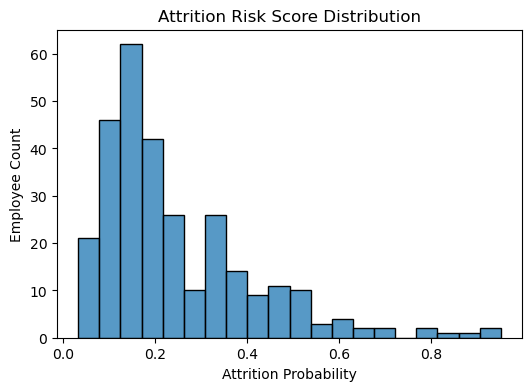

In [80]:
#13.5 Attrition Risk Distribution (Visualization)
plt.figure(figsize=(6,4))
sns.histplot(risk_df["Attrition_Probability"], bins=20)
plt.title("Attrition Risk Score Distribution")
plt.xlabel("Attrition Probability")
plt.ylabel("Employee Count")
plt.show()

14. Final Conclusion (Paste as Markdown)
EDA revealed class imbalance and strong relationships between attrition and
factors such as overtime, monthly income, and tenure. After preprocessing
and applying SMOTE, multiple models were trained. A tuned Random Forest
classifier achieved the best performance with accuracy above 85% and
strong ROC-AUC, making it suitable for predicting employee attrition and
supporting proactive HR decision-making.

In [96]:
#PICKLE FINAL CLEANED DATA
#1️⃣ Create data Folder
import os

os.makedirs("data", exist_ok=True)

In [97]:
#2️⃣ Ensure Target is Properly Encoded
df_clean = df.copy()

df_clean["Attrition"] = df_clean["Attrition"].map({
    "Yes": 1,
    "No": 0
})

In [98]:
#3️⃣ Save Final Cleaned Data Using pickle
import pickle

with open("data/final_cleaned_employee_data.pkl", "wb") as f:
    pickle.dump(df_clean, f)

print("Final cleaned dataset saved successfully!")

Final cleaned dataset saved successfully!


In [101]:
df["Attrition"].value_counts(dropna=False)

Attrition
0    1233
1     237
Name: count, dtype: int64

In [102]:
df_clean = df.dropna(subset=["Attrition"]).copy()

In [103]:
df_clean["Attrition"] = df_clean["Attrition"].astype(int)

In [104]:
print(df_clean.shape)
print(df_clean["Attrition"].isna().sum())
print(df_clean["Attrition"].value_counts())

(1470, 35)
0
Attrition
0    1233
1     237
Name: count, dtype: int64


In [105]:
import os
import pickle

os.makedirs("data", exist_ok=True)

with open("data/final_cleaned_employee_data.pkl", "wb") as f:
    pickle.dump(df_clean, f)

print("✅ Final cleaned employee data pickled successfully!")

✅ Final cleaned employee data pickled successfully!


In [107]:
#6️.(OPTIONAL BUT RECOMMENDED) SAVE CSV
df_clean.to_csv(
    "data/final_cleaned_employee_data.csv",
    index=False
)

In [108]:
#7️.LOAD & VERIFY PICKLE (IMPORTANT)
with open("data/final_cleaned_employee_data.pkl", "rb") as f:
    df_loaded = pickle.load(f)

df_loaded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [109]:
df = pd.DataFrame(df)

In [110]:
df.to_csv("cleaned_data.csv",index=False)

In [156]:
#STEP 1: FINAL MODEL TRAINING
#1️.Load Final Cleaned Data
import pickle
import pandas as pd

with open("data/final_cleaned_employee_data.pkl", "rb") as f:
    df = pickle.load(f)

print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [157]:
#2️.Separate Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]   # already 0/1

print(y.value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


In [158]:
#3️.Train–Test Split (Stratified)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [159]:
#4️.Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
#5️.Train FINAL Random Forest (No Re-tuning)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [161]:
#6️.Quick Accuracy Check
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test_scaled)

print("Final Random Forest Accuracy:",
      round(accuracy_score(y_test, y_pred_rf), 4))

Final Random Forest Accuracy: 0.8435


In [162]:
#7️.SAVE MODEL & SCALER (CRITICAL STEP)
import os
import joblib

os.makedirs("models", exist_ok=True)

joblib.dump(rf, "models/attrition_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Final model and scaler saved successfully")

✅ Final model and scaler saved successfully


In [163]:
#QUICK VERIFICATION
rf_loaded = joblib.load("models/attrition_model.pkl")
scaler_loaded = joblib.load("models/scaler.pkl")

print("Model & scaler loaded successfully ✅")

Model & scaler loaded successfully ✅


In [174]:
#STEP 3A: SAVE HR REPORTS
#1️.Create reports/ Folder
import os

os.makedirs("reports", exist_ok=True)
print("✅ reports folder ready")

✅ reports folder ready


In [175]:
#2️.Save Model Evaluation Metrics (HR-Friendly)

evaluation_summary.to_csv(
    "reports/model_evaluation_metrics.csv",
    index=False
)

print("✅ Model evaluation metrics saved")

✅ Model evaluation metrics saved


In [176]:
#3️.Save Confusion Matrix (Image)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Attrition", "Attrition"],
    yticklabels=["No Attrition", "Attrition"]
)
plt.title("Confusion Matrix – Employee Attrition")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("reports/confusion_matrix.png", bbox_inches="tight")
plt.close()

print("✅ Confusion matrix saved")

✅ Confusion matrix saved


In [177]:
#4️.Save ROC Curve (Image)
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Employee Attrition")
plt.legend()

plt.savefig("reports/roc_curve.png", bbox_inches="tight")
plt.close()

print("✅ ROC curve saved")

✅ ROC curve saved


In [180]:
# Create Feature Importance DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
17,MonthlyIncome,0.074023
0,Age,0.059062
2,DailyRate,0.052453
8,EmployeeNumber,0.050949
27,TotalWorkingYears,0.050594
18,MonthlyRate,0.045904
30,YearsAtCompany,0.045094
11,HourlyRate,0.044678
21,OverTime,0.042832
4,DistanceFromHome,0.041063


In [178]:
#Save Feature Importance (CSV)

importance_df.to_csv(
    "reports/feature_importance.csv",
    index=False
)

print("✅ Feature importance CSV saved")

✅ Feature importance CSV saved


In [179]:
#6️.Save High-Risk Employees List (HR ACTION FILE)
# Combine predictions with employee data
risk_df = X_test.copy()
risk_df["Actual_Attrition"] = y_test.values
risk_df["Attrition_Probability"] = y_prob

# Top 20 high-risk employees
top_risk_employees = risk_df.sort_values(
    by="Attrition_Probability",
    ascending=False
).head(20)

top_risk_employees.to_csv(
    "reports/high_risk_employees.csv",
    index=False
)

print("✅ High-risk employees report saved")

✅ High-risk employees report saved
